In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
from scipy.stats import binned_statistic

In [4]:
plt.rcParams['axes.grid'] = True

In [36]:
file = np.genfromtxt('catRawMags1305/catDir/matchedFLCpsf1706_combwMean.dat',names=True)

In [37]:
g_idx = np.logical_and(file['magPSF_f606w']>10,file['magPSF_f814w']>10)
file_g = file[g_idx]

In [39]:
def func814(x, a=4.26009206e+09, b=1.21970123e+00, c=-2.32028097e-01):
    return -a * np.exp(-b * x) + c

def func606(x, a=2.54100180e+10, b=1.31463659e+00, c=-1.78774669e-01):
    return -a * np.exp(-b * x) + c

In [40]:
# han_i = file_g['magZPT_f814w']
# han_v = file_g['magZPT_f606w']

han_i = file_g['mean_f814w'] + func814(file_g['mean_f814w'])
han_v = file_g['mean_f606w'] + func606(file_g['mean_f606w'])

mat_i = file_g['magPSF_f814w']
mat_v = file_g['magPSF_f606w']

han_c = han_v - han_i
mat_c = mat_v - mat_i

In [42]:
mean1 = np.mean(stats.sigmaclip(han_v-mat_v,4,4)[0])
median1 = np.median(stats.sigmaclip(han_v-mat_v,4,4)[0])

In [43]:
len(stats.sigmaclip(han_v-mat_v,4,4)[0])

1194

In [44]:
median2 = np.median(stats.sigmaclip(han_i-mat_i,4,4)[0])

In [45]:
median3 = np.median(stats.sigmaclip(han_c-mat_c,4,4)[0])

In [46]:
mean2 = np.mean(stats.sigmaclip(han_i-mat_i,4,4)[0])
mean3 = np.mean(stats.sigmaclip(han_c-mat_c,4,4)[0])

print(mean1,mean2,mean3)

0.04773642827256821 0.05754039357373527 -0.012707883341231282


In [47]:
mean1 = np.mean(han_v-mat_v)
mean2 = np.mean(han_i-mat_i)
mean3 = np.mean(han_c-mat_c)

print(mean1,mean2,mean3)

-0.004991774796603544 0.009081203748124154 -0.014072978544727699


In [48]:
bin_means1, bin_edges1, binnum1= binned_statistic(mat_v, han_v-mat_v, \
                    bins=10, range=(19.5, 29),statistic='mean')

In [49]:
bin_width = (bin_edges1[1] - bin_edges1[0])
bin_cent1 = bin_edges1[1:] - bin_width/2

In [50]:
bin_means2, bin_edges2, binnum2= binned_statistic(mat_i, han_i-mat_i, \
                    bins=10, range=(19.5, 29),statistic='mean')

bin_width = (bin_edges2[1] - bin_edges2[0])
bin_cent2 = bin_edges2[1:] - bin_width/2

In [51]:
bin_means3, bin_edges3, binnum3= binned_statistic(mat_c, han_c-mat_c, \
                    bins=10, range=(-1,2.5),statistic='mean')

bin_width = (bin_edges3[1] - bin_edges3[0])
bin_cent3 = bin_edges3[1:] - bin_width/2

In [52]:
bin_means4, bin_edges4, binnum4= binned_statistic(mat_v, \
        han_v-mat_v, \
                    bins=10, range=(19.5,29),statistic='std')

bin_width = (bin_edges4[1] - bin_edges4[0])
bin_cent4 = bin_edges4[1:] - bin_width/2

bin_val4 = bin_means4/np.sqrt(len(mat_v))

In [53]:
bin_means5, bin_edges5, binnum5= binned_statistic(mat_i, \
        han_i-mat_i, \
                    bins=10, range=(19.5,29),statistic='std')

bin_width = (bin_edges5[1] - bin_edges5[0])
bin_cent5 = bin_edges5[1:] - bin_width/2

bin_val5 = bin_means5/np.sqrt(len(mat_i))

In [54]:
bin_means6, bin_edges6, binnum6= binned_statistic(mat_c, \
        han_c-mat_c, \
                    bins=10, range=(-1,2.5),statistic='std')

bin_width = (bin_edges6[1] - bin_edges6[0])
bin_cent6 = bin_edges6[1:] - bin_width/2

bin_val6 = bin_means6/np.sqrt(len(mat_c))

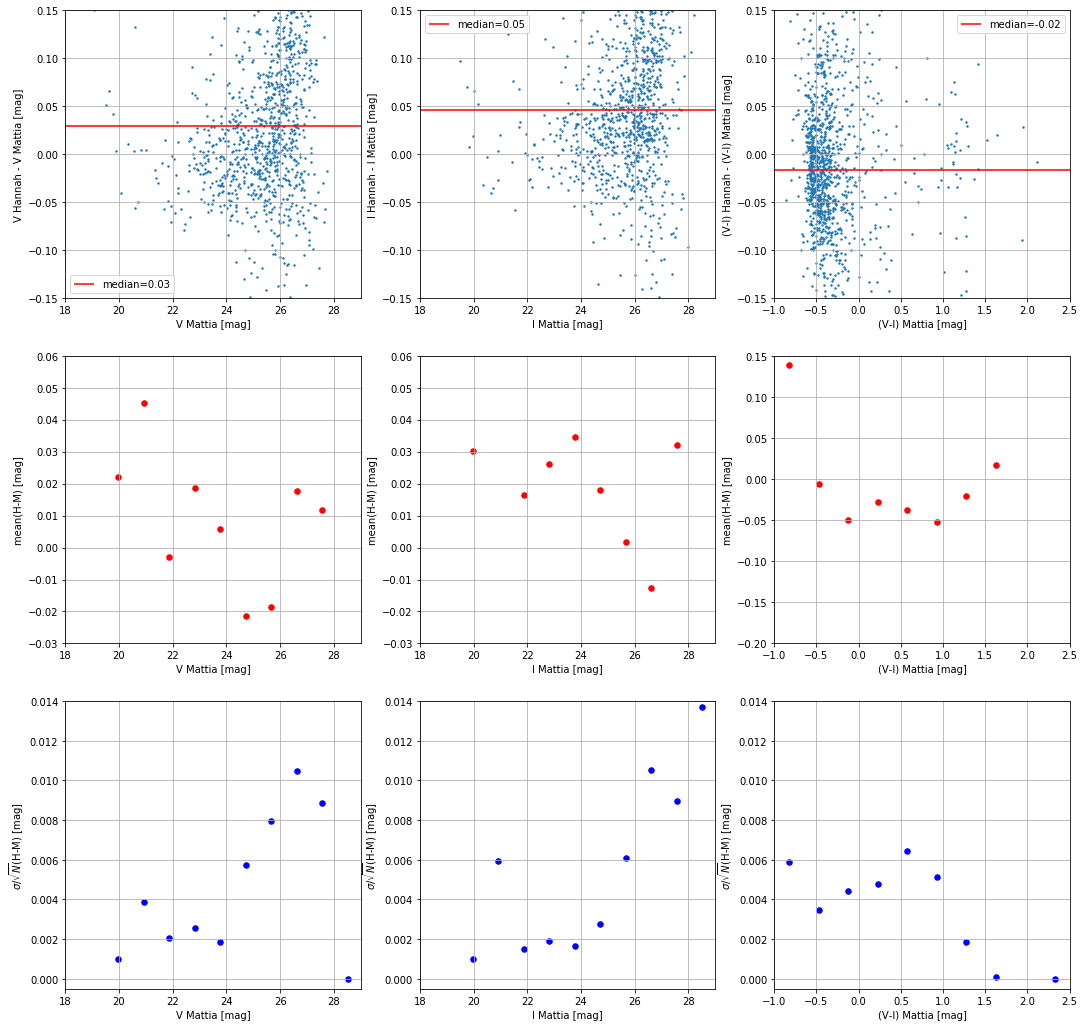

In [55]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(18,18))

ax1.scatter(mat_v,han_v-mat_v,s=2)
ax1.set_xlim(18,29)
ax1.set_ylim(-0.15,0.15)
ax1.hlines(median1,18,29,color='red',label='median={0:.2f}'.format(median1))
ax1.set_ylabel('V Hannah - V Mattia [mag]')
ax1.set_xlabel('V Mattia [mag]')
ax1.legend()

ax2.scatter(mat_i,han_i-mat_i,s=2)
ax2.set_xlim(18,29)
ax2.set_ylim(-0.15,0.15)
ax2.hlines(median2,18,29,color='red',label='median={0:.2f}'.format(median2))
ax2.set_ylabel('I Hannah - I Mattia [mag]')
ax2.set_xlabel('I Mattia [mag]')
ax2.legend()

ax3.scatter(mat_c,han_c-mat_c,s=2)
ax3.set_xlim(-1,2.5)
ax3.set_ylim(-0.15,0.15)
ax3.hlines(median3,-1,2.5,color='red',label='median={0:.2f}'.format(median3))
ax3.set_ylabel('(V-I) Hannah - (V-I) Mattia [mag]')
ax3.set_xlabel('(V-I) Mattia [mag]')
ax3.legend()

ax4.scatter(bin_cent1,bin_means1,s=30,color='red')
ax4.set_xlim(18,29)
ax4.set_ylim(-0.03,0.06)
ax4.set_ylabel('mean(H-M) [mag]')
ax4.set_xlabel('V Mattia [mag]')

ax5.scatter(bin_cent2,bin_means2,s=30,color='red')
ax5.set_xlim(18,29)
ax5.set_ylim(-0.03,0.06)
ax5.set_ylabel('mean(H-M) [mag]')
ax5.set_xlabel('I Mattia [mag]')

ax6.scatter(bin_cent3,bin_means3,s=30,color='red')
ax6.set_xlim(-1,2.5)
# ax6.set_ylim(-0.03,0.06)
ax6.set_ylim(-0.2,0.15)
ax6.set_ylabel('mean(H-M) [mag]')
ax6.set_xlabel('(V-I) Mattia [mag]')

ax7.scatter(bin_cent4,bin_val4,s=30,color='blue')
ax7.set_xlim(18,29)
ax7.set_ylim(-0.0005,0.014)
ax7.set_xlabel('V Mattia [mag]')
ax7.set_ylabel(r'$\sigma$/$\sqrt{N}$(H-M) [mag]')

ax8.scatter(bin_cent5,bin_val5,s=30,color='blue')
ax8.set_xlim(18,29)
ax8.set_ylim(-0.0005,0.014)
ax8.set_xlabel('I Mattia [mag]')
ax8.set_ylabel(r'$\sigma$/$\sqrt{N}$(H-M) [mag]')

ax9.scatter(bin_cent6,bin_val6,s=30,color='blue')
ax9.set_xlim(-1,2.5)
ax9.set_ylim(-0.0005,0.014)
ax9.set_xlabel('(V-I) Mattia [mag]')
ax9.set_ylabel(r'$\sigma$/$\sqrt{N}$(H-M) [mag]')


plt.show()
# plt.savefig('flcMatchedPSF.png',dpi=600,bbox_inches='tight')

In [56]:
file = np.genfromtxt('flcDRC1106_magCut.dat',names=True)

In [57]:
y = file['magDRC']-file['mean']
x = file['magDRC']

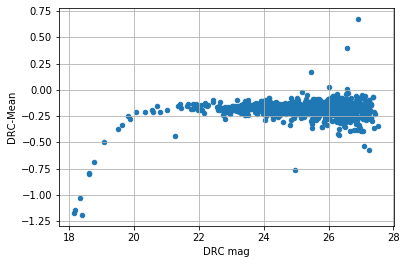

In [58]:
fig,ax = plt.subplots()

ax.scatter(x,y,s=20)

ax.set_ylabel('DRC-Mean')
ax.set_xlabel('DRC mag')

plt.show()

In [59]:
# from scipy.optimize import curve_fit

In [60]:
# idx = np.argsort(x)

In [61]:
# def func(x, a, b, c):
#     return -a * np.exp(-b * x) + c

In [62]:
# def func606(x, a=2.54100180e+10, b=1.31463659e+00, c=-1.78774669e-01):
#     return -a * np.exp(-b * x) + c

In [63]:
# popt, pcov = curve_fit(func, x[idx], y[idx],p0=p0)

In [64]:
# print(popt)

In [65]:
# plt.scatter(x,func(x))

# plt.show()

In [66]:
# file = np.genfromtxt('flcDRC0506_magCut.dat',names=True)

In [67]:
# y = file['magDRC']-file['mean']
# x = file['magDRC']

In [68]:
# fig,ax = plt.subplots()

# ax.scatter(x,y,s=20)

# ax.set_ylabel('DRC-Mean')
# ax.set_xlabel('DRC mag')

# plt.show()

In [69]:
# idx = np.argsort(x)

In [70]:
# def func(x, a, b, c):
#     return -a * np.exp(-b * x) + c

In [71]:
# popt, pcov = curve_fit(func, x[idx], y[idx],p0=p0)

In [72]:
# plt.scatter(x, func(x, *popt))

# plt.show()

In [73]:
# print(popt)

In [74]:
# def func814(x, a=4.26009206e+09, b=1.21970123e+00, c=-2.32028097e-01):
#     return -a * np.exp(-b * x) + c